In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns


df = pd.read_csv ('bank-full.csv',sep=';')
df.describe ()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [118]:
df.isna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [119]:
df = df.dropna()

In [120]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
df.tail(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
45192,29,management,single,tertiary,no,765,no,no,cellular,16,nov,238,1,-1,0,unknown,yes
45193,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
45195,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes
45196,25,student,single,secondary,no,358,no,no,cellular,16,nov,330,1,-1,0,unknown,yes
45197,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,unknown,yes
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,yes


In [9]:
Subscription_ratio = df.groupby('y').count()['marital']
Subscription_ratio

y
no     39922
yes     5289
Name: marital, dtype: int64

<Axes: title={'center': 'Subscription Ratio'}>

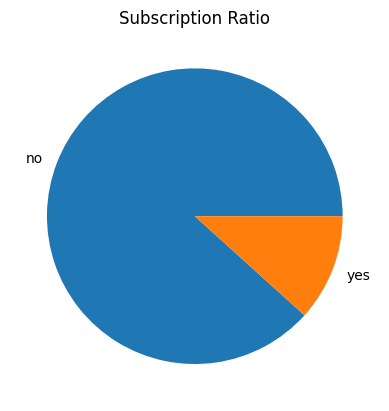

In [10]:
Subscription_ratio.plot(kind='pie', ylabel='', title='Subscription Ratio')

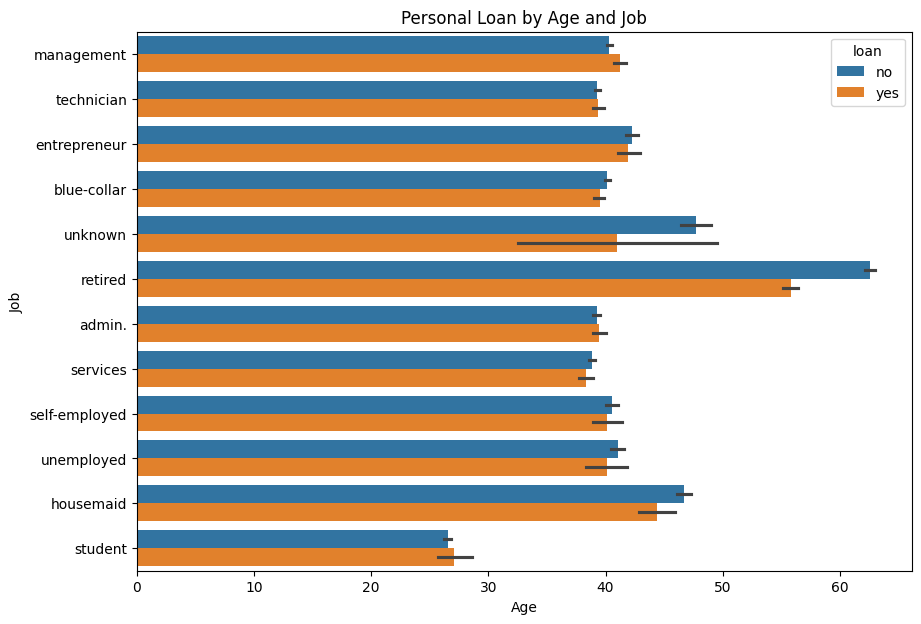

In [11]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df, x='age', y='job', hue='loan')
plt.title('Personal Loan by Age and Job')
plt.xlabel('Age')
plt.ylabel('Job')
plt.show()

In [12]:
balance_by_age = df.groupby('age').count()['balance']
balance_by_age

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: balance, Length: 77, dtype: int64

<Axes: title={'center': 'Analysis of Yearly Balance by Age'}, xlabel='age'>

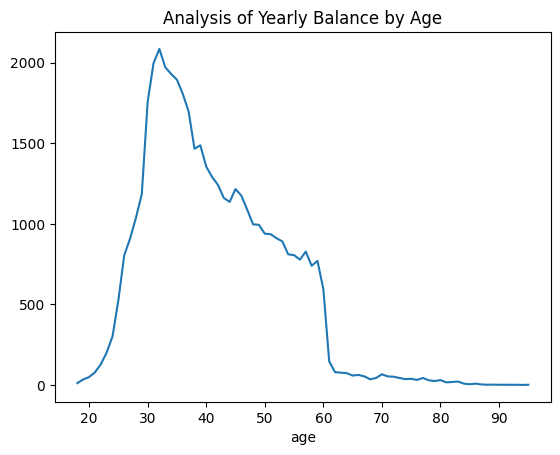

In [13]:
balance_by_age.plot(kind='line', ylabel='', title='Analysis of Yearly Balance by Age')

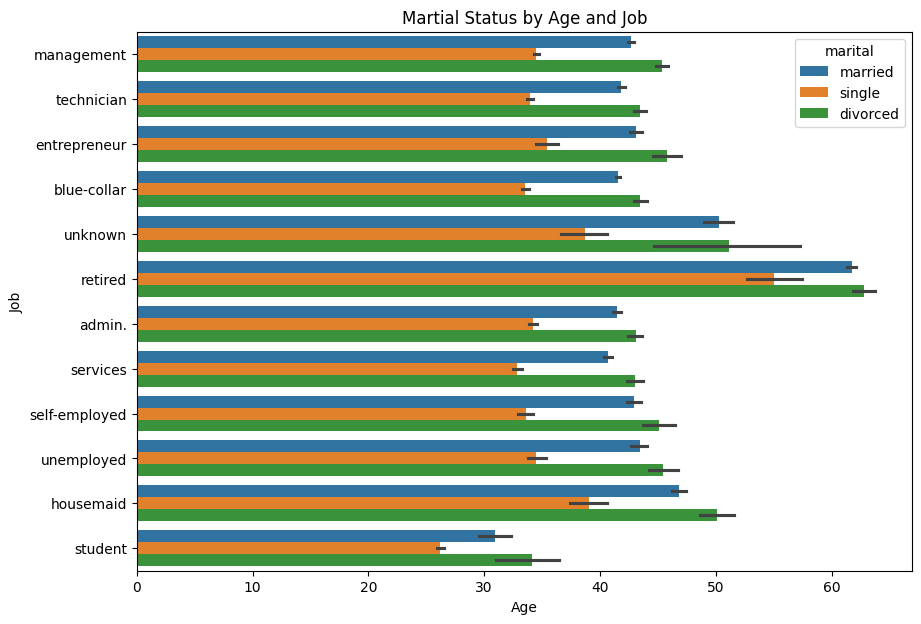

In [14]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df, x='age', y='job', hue='marital')
plt.title('Martial Status by Age and Job')
plt.xlabel('Age')
plt.ylabel('Job')
plt.show()

In [15]:
Poutcome_by_age = df.groupby('age').count()['poutcome']
Poutcome_by_age

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: poutcome, Length: 77, dtype: int64

<Axes: title={'center': 'Previous Campaign Success based on Age'}, xlabel='Age', ylabel='Previous Outcome'>

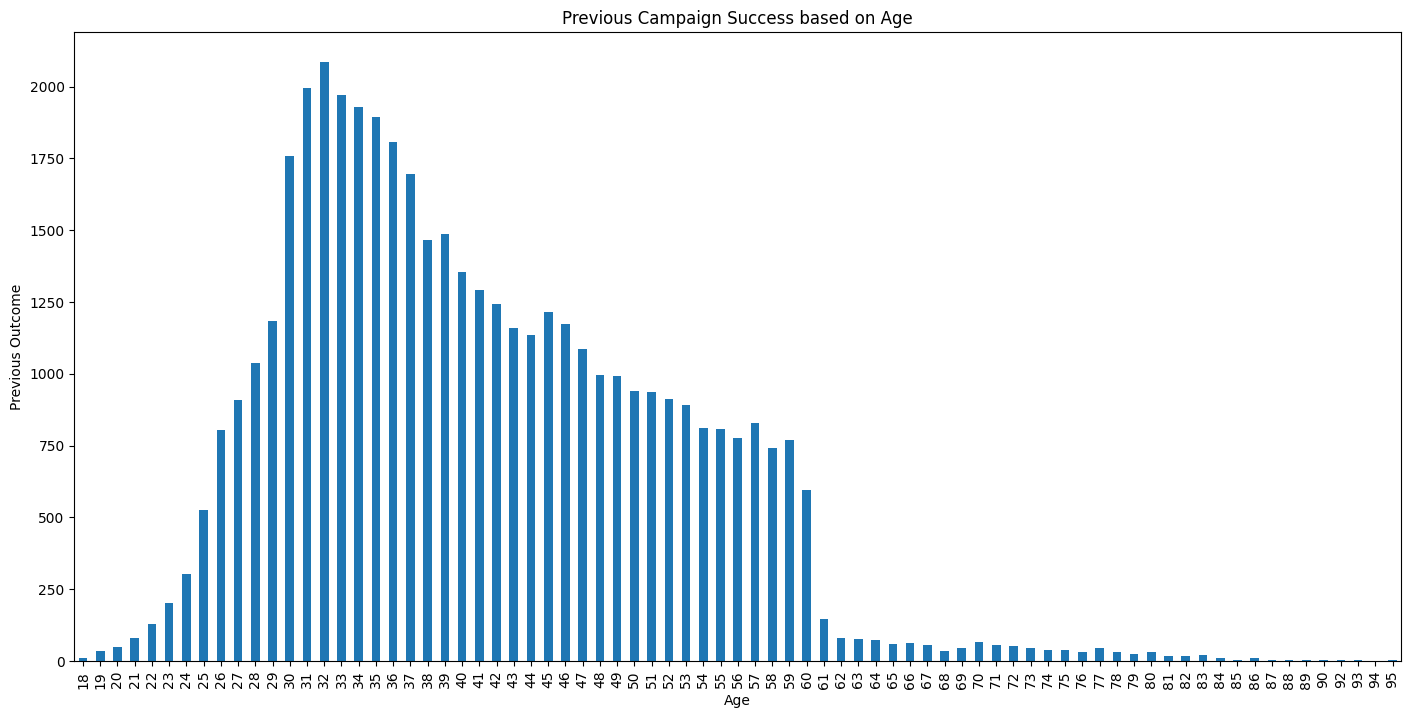

In [16]:
plt.figure(figsize=(14, 7))
plt.xticks(rotation=60)
plt.tight_layout()
Poutcome_by_age.plot(kind='bar', xlabel='Age', ylabel='Previous Outcome', title='Previous Campaign Success based on Age')

In [17]:
Poutcome_by_job = df.groupby('job').count()['poutcome']
Poutcome_by_job

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: poutcome, dtype: int64

<Axes: title={'center': 'Previous Campaign Success based on Job'}, xlabel='Job', ylabel='Previous Outcome'>

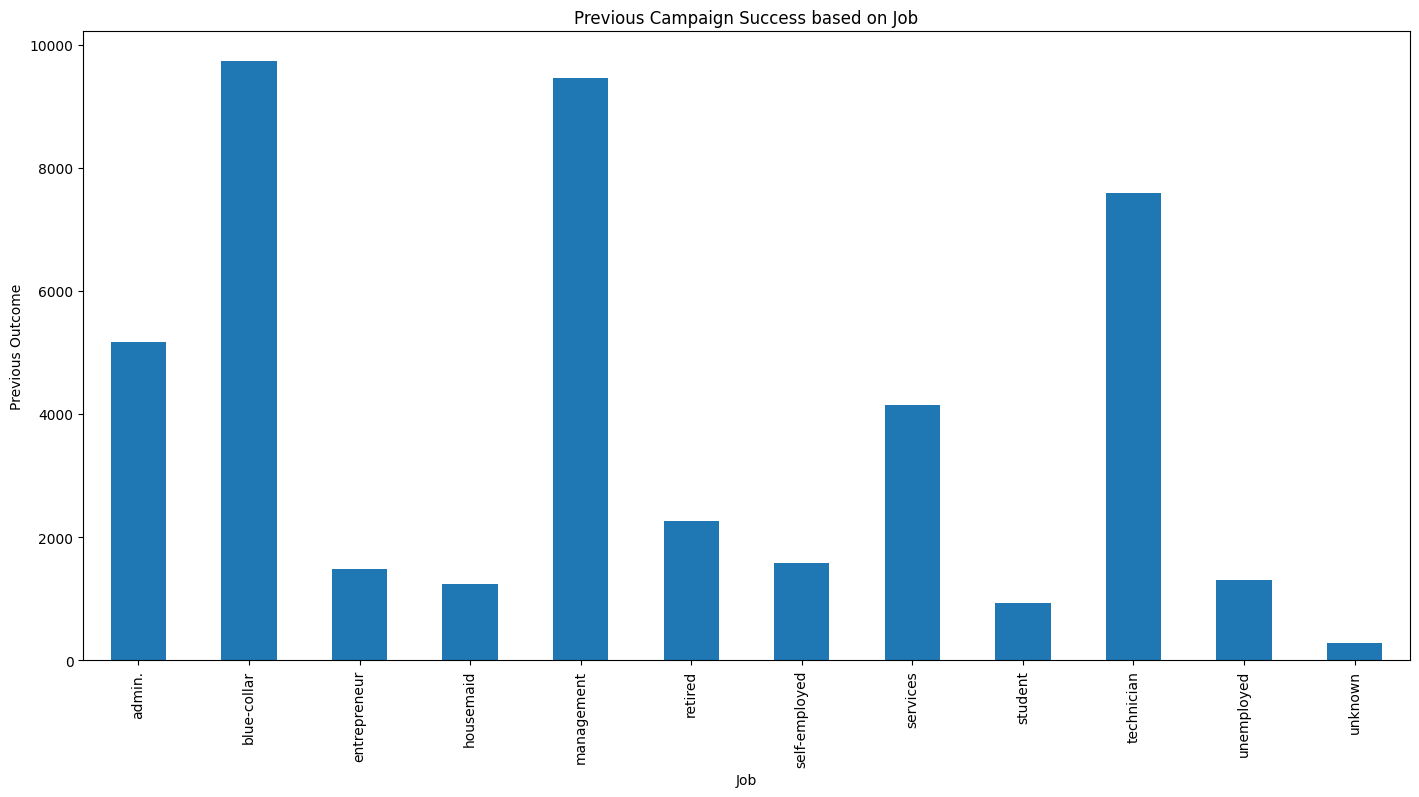

In [18]:
plt.figure(figsize=(14, 7))
plt.xticks(rotation=60)
plt.tight_layout()
Poutcome_by_job.plot(kind='bar', xlabel='Job', ylabel='Previous Outcome', title='Previous Campaign Success based on Job')

In [19]:
loan_by_marital = df.groupby('marital').count()['loan']
loan_by_marital

marital
divorced     5207
married     27214
single      12790
Name: loan, dtype: int64

<Axes: title={'center': 'Personal Loan Taken based on Marital Status'}, xlabel='Marital Status', ylabel='Loan'>

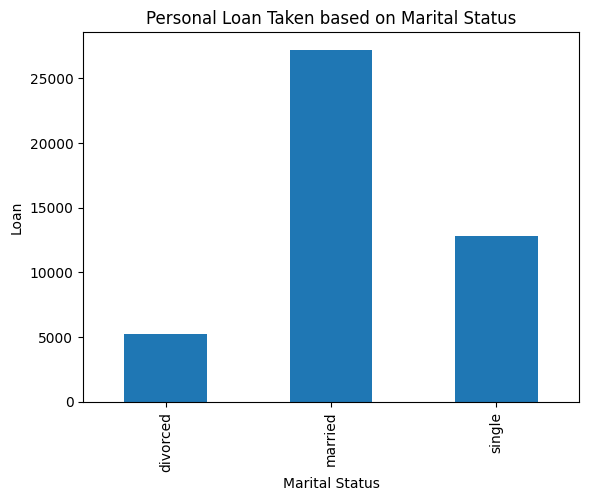

In [20]:
loan_by_marital.plot(kind='bar', xlabel='Marital Status', ylabel='Loan', title='Personal Loan Taken based on Marital Status')

In [21]:
housing_by_marital = df.groupby('marital').count()['loan']
loan_by_marital

marital
divorced     5207
married     27214
single      12790
Name: loan, dtype: int64

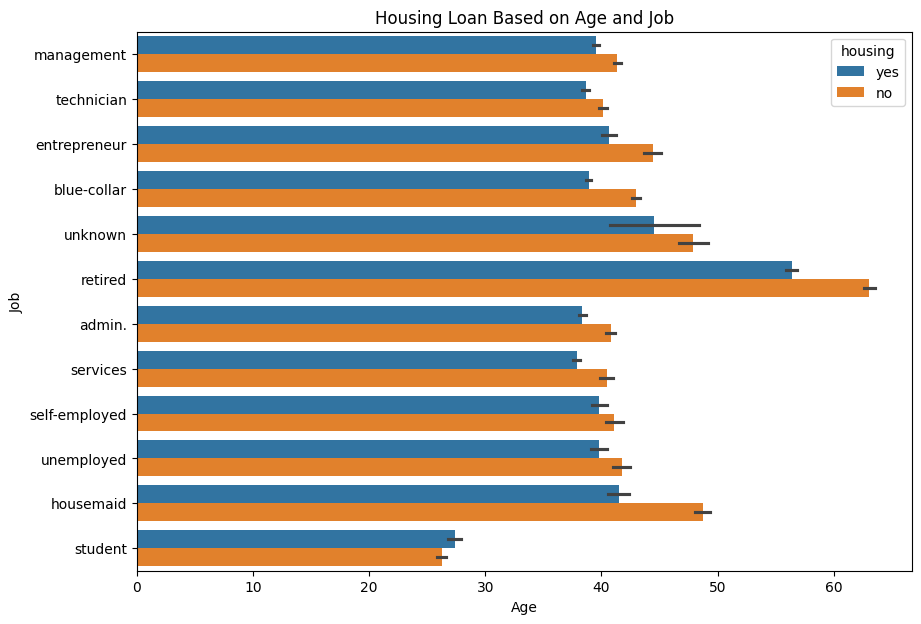

In [22]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df, x='age', y='job', hue='housing')
plt.title('Housing Loan Based on Age and Job')
plt.xlabel('Age')
plt.ylabel('Job')
plt.show()

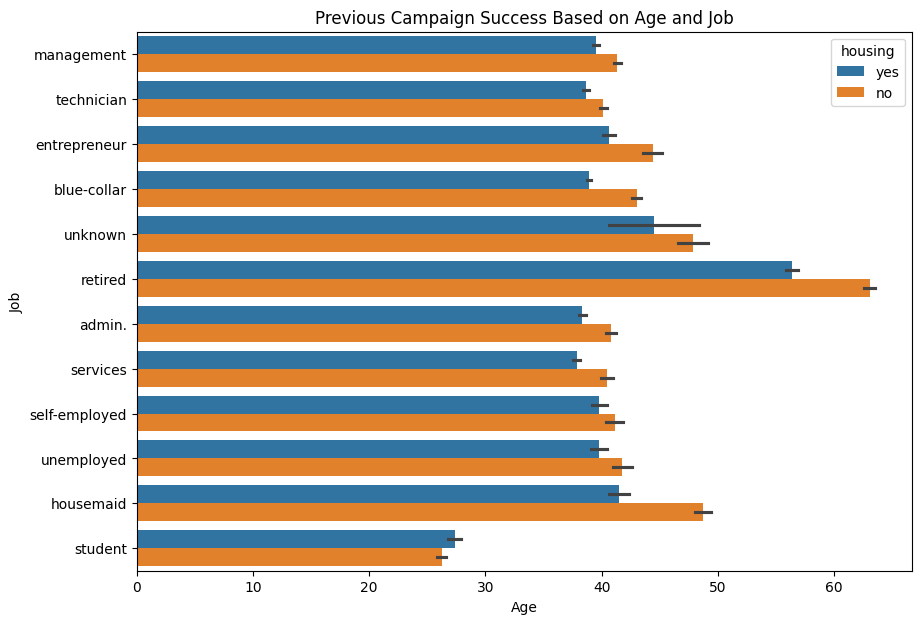

In [23]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df, x='age', y='job', hue='housing')
plt.title('Previous Campaign Success Based on Age and Job')
plt.xlabel('Age')
plt.ylabel('Job')
plt.show()

In [24]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [25]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [26]:
Poutcome_by_contact = df.groupby('contact').count()['poutcome']
Poutcome_by_contact

contact
cellular     29285
telephone     2906
unknown      13020
Name: poutcome, dtype: int64

<Axes: title={'center': 'Previous Campaign Success based on Campaign Type'}, xlabel='Contact Type', ylabel='Previous Outcome'>

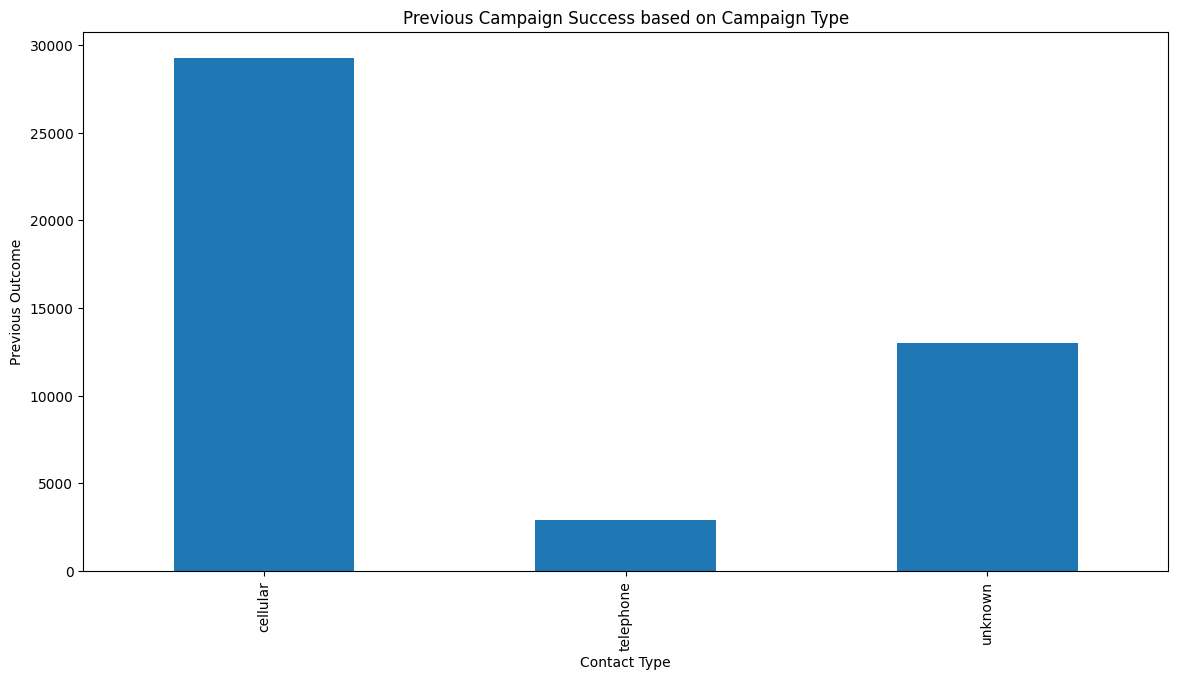

In [27]:
plt.figure(figsize=(14, 7))
plt.tight_layout()
Poutcome_by_contact.plot(kind='bar', xlabel='Contact Type', ylabel='Previous Outcome', title='Previous Campaign Success based on Campaign Type')

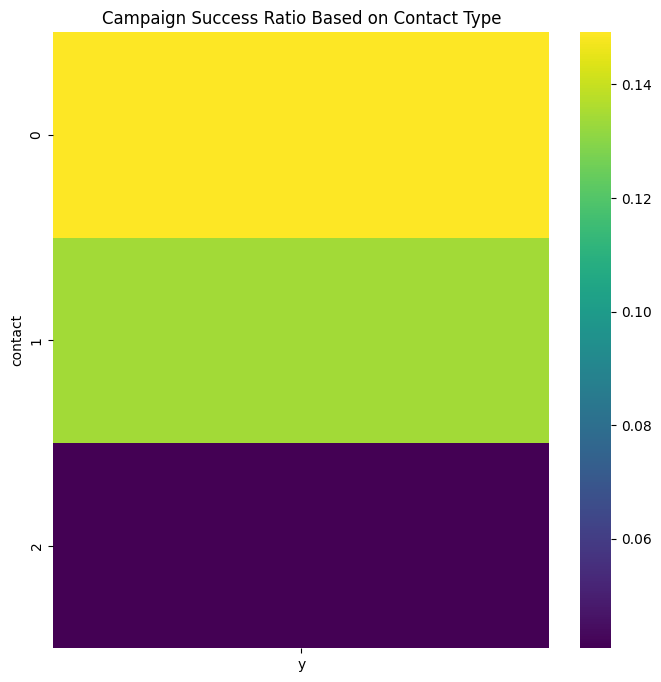

In [197]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.pivot_table(index='contact', values='y'), cmap='viridis')
plt.title('Campaign Success Ratio Based on Contact Type')
plt.show()

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df['y'].unique()
df['y'].value_counts()
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df['y']=encoder.fit_transform(df['y'])

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,0


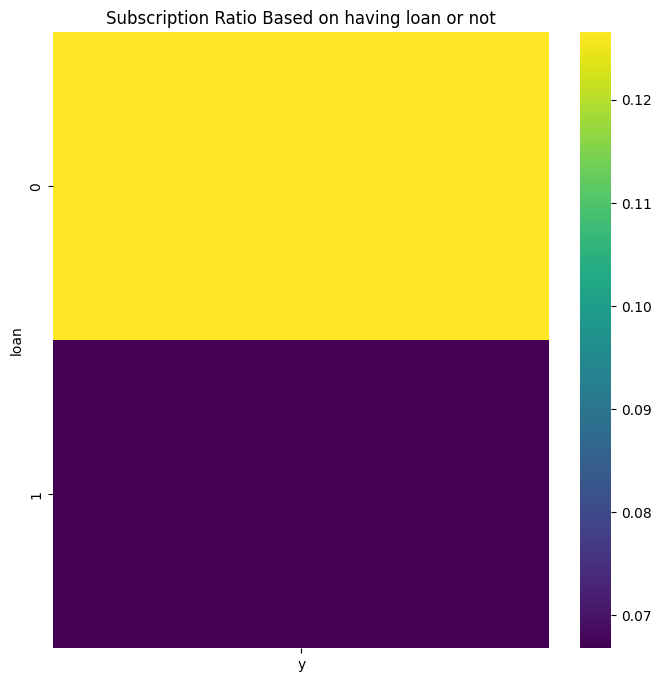

In [232]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.pivot_table(index='loan', values='y'), cmap='viridis')
plt.title('Subscription Ratio Based on having loan or not')
plt.show()

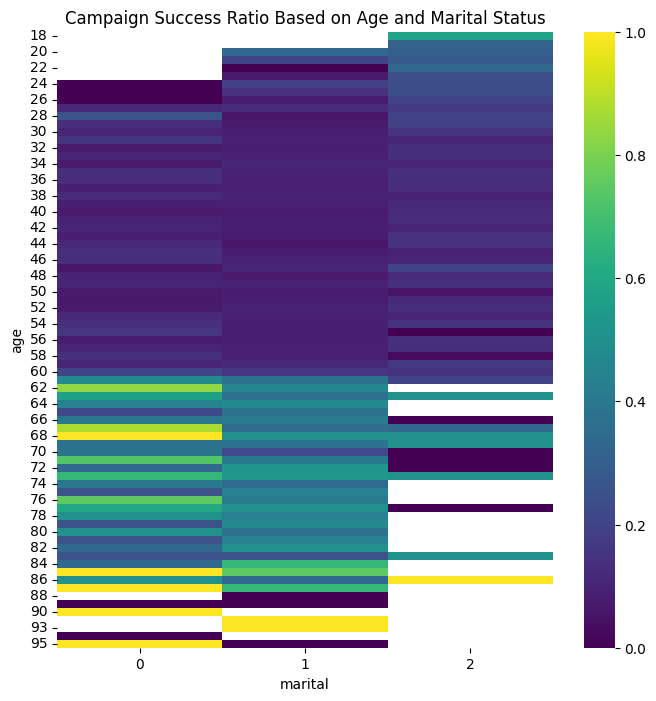

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.pivot_table(index='age', columns='marital', values='y'), cmap='viridis')
plt.title('Campaign Success Ratio Based on Age and Marital Status')
plt.show()

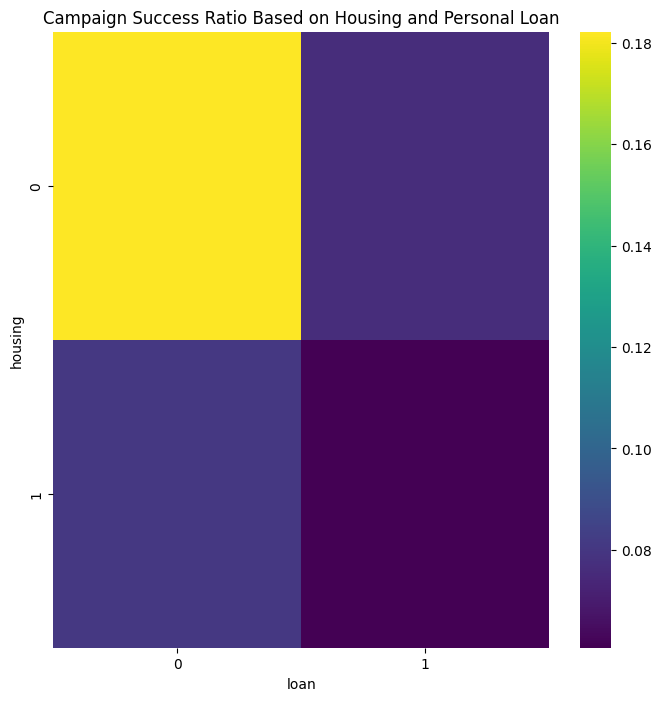

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.pivot_table(index='housing', columns='loan', values='y'), cmap='viridis')
plt.title('Campaign Success Ratio Based on Housing and Personal Loan')
plt.show()

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,no,2143,1,0,2,5,may,261,1,-1,0,3,0
1,44,9,2,1,no,29,1,0,2,5,may,151,1,-1,0,3,0
2,33,2,1,1,no,2,1,1,2,5,may,76,1,-1,0,3,0
3,47,1,1,3,no,1506,1,0,2,5,may,92,1,-1,0,3,0
4,33,11,2,3,no,1,0,0,2,5,may,198,1,-1,0,3,0


Predictive Modelling

In [80]:
from sklearn.preprocessing import LabelEncoder

df['job'].unique()
df['job'].value_counts()
encoder=LabelEncoder()
df['job']=encoder.fit_transform(df['job'])

df['marital'].unique()
df['marital'].value_counts()
encoder=LabelEncoder()
df['marital']=encoder.fit_transform(df['marital'])

df['housing'].unique()
df['housing'].value_counts()
encoder=LabelEncoder()
df['housing']=encoder.fit_transform(df['housing'])

df['contact'].unique()
df['contact'].value_counts()
encoder=LabelEncoder()
df['contact']=encoder.fit_transform(df['contact'])

df['education'].unique()
df['education'].value_counts()
encoder=LabelEncoder()
df['education']=encoder.fit_transform(df['education'])

df['loan'].unique()
df['loan'].value_counts()
encoder=LabelEncoder()
df['loan']=encoder.fit_transform(df['loan'])

df['poutcome'].unique()
df['poutcome'].value_counts()
encoder=LabelEncoder()
df['poutcome']=encoder.fit_transform(df['poutcome'])

df['campaign'].unique()
df['campaign'].value_counts()
encoder=LabelEncoder()
df['campaign']=encoder.fit_transform(df['campaign'])

df['balance'].unique()
df['balance'].value_counts()
encoder=LabelEncoder()
df['balance']=encoder.fit_transform(df['balance'])

df['previous'].unique()
df['previous'].value_counts()
encoder=LabelEncoder()
df['previous']=encoder.fit_transform(df['previous'])

df['day'].unique()
df['day'].value_counts()
encoder=LabelEncoder()
df['day']=encoder.fit_transform(df['day'])

df['pdays'].unique()
df['pdays'].value_counts()
encoder=LabelEncoder()
df['pdays']=encoder.fit_transform(df['pdays'])

df['month'].unique()
df['month'].value_counts()
encoder=LabelEncoder()
df['month']=encoder.fit_transform(df['month'])

df['y'].unique()
df['y'].value_counts()
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df['y']=encoder.fit_transform(df['y'])

df['default'].unique()
df['default'].value_counts()
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df['default']=encoder.fit_transform(df['default'])


In [ ]:
#X=df[['age','job','marital','education','balance','housing','loan','contact','duration','campaign','pdays','poutcome']]
#Y=df[['y']]

#Model score:21.09 Linear Regression

In [78]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [217]:
X=df[['age','job','marital','balance','housing','loan','contact','day','month','duration','campaign','previous','poutcome','pdays','default']]
Y=df[['y']]

X

,age,job,marital,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,pdays,default
0,58,4,1,3036,1,0,2,4,8,261,0,0,3,0,0
1,44,9,2,945,1,0,2,4,8,151,0,0,3,0,0
2,33,2,1,918,1,1,2,4,8,76,0,0,3,0,0
3,47,1,1,2420,1,0,2,4,8,92,0,0,3,0,0
4,33,11,2,917,0,0,2,4,8,198,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,1741,0,0,0,16,9,977,2,0,3,0,0
45207,71,5,0,2639,0,0,0,16,9,456,1,0,3,0,0
45208,72,5,1,5455,0,0,0,16,9,1127,4,3,2,181,0
45209,57,1,1,1584,0,0,1,16,9,508,3,0,3,0,0


In [82]:
Y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [182]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 12)

In [183]:
x_train

,age,job,marital,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,pdays,default
37156,35,4,2,3589,0,0,0,12,8,127,0,0,3,0,0
20494,30,4,2,1359,1,1,0,11,1,80,1,0,3,0,0
35272,39,4,2,4692,1,0,0,6,8,40,0,0,3,0,0
22260,49,7,1,1316,0,0,0,20,1,151,2,0,3,0,0
2728,28,9,2,1384,1,0,2,12,8,152,2,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36482,29,4,2,916,1,0,0,11,8,116,1,0,3,0,0
40177,53,4,0,1296,0,1,0,4,6,438,1,0,3,0,0
19709,32,4,2,1228,0,0,0,6,1,37,2,0,3,0,0
38555,57,9,1,1141,1,0,1,14,8,22,6,12,0,334,0


<Axes: >

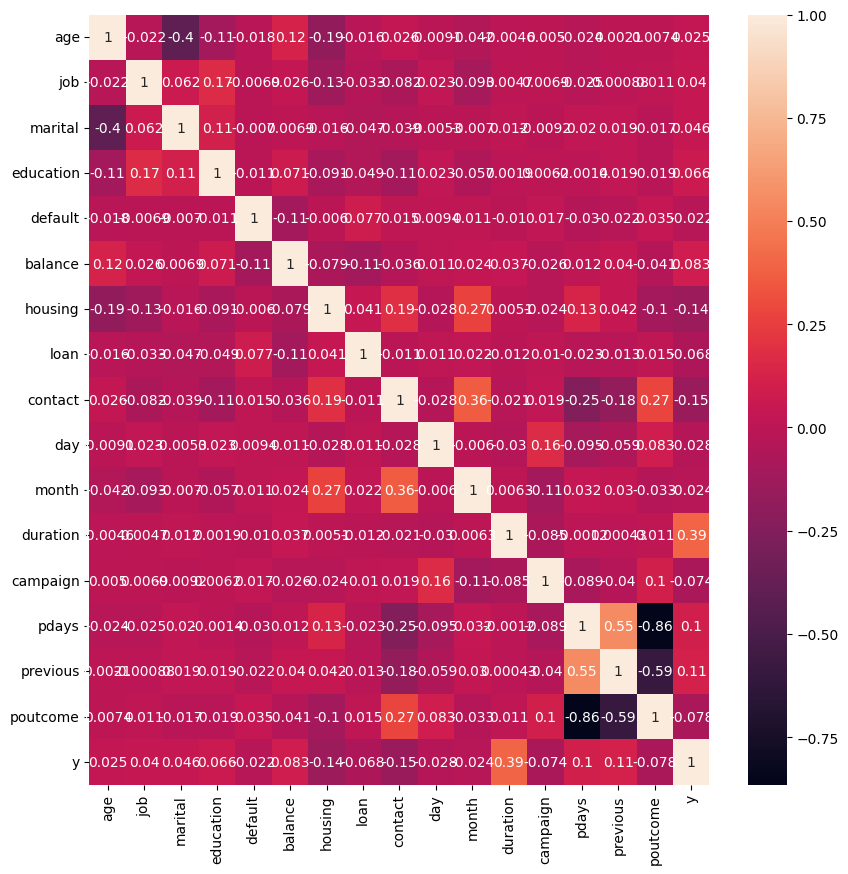

In [196]:
df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

Linear Regression

In [184]:
from sklearn.linear_model import LinearRegression

lr_model=LinearRegression()

lr_model.fit(x_train,y_train)

y_pred= lr_model.predict(x_test)


In [186]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

import math
x=math.sqrt(mse)
x

0.2821057586516904

In [187]:
score=lr_model.score(x_test,y_test)
print(f'Model score:{score*100:.2f}')

Model score:22.28


In [188]:
X_filtered = X.map(lambda x: x if x >= 0 else None).dropna()

print("DataFrame after dropping negative values:")
print(X_filtered)

DataFrame after dropping negative values:
       age  job  marital  balance  housing  loan  contact  day  month  \
0       58    4        1     3036        1     0        2    4      8   
1       44    9        2      945        1     0        2    4      8   
2       33    2        1      918        1     1        2    4      8   
3       47    1        1     2420        1     0        2    4      8   
4       33   11        2      917        0     0        2    4      8   
...    ...  ...      ...      ...      ...   ...      ...  ...    ...   
45206   51    9        1     1741        0     0        0   16      9   
45207   71    5        0     2639        0     0        0   16      9   
45208   72    5        1     5455        0     0        0   16      9   
45209   57    1        1     1584        0     0        1   16      9   
45210   37    2        1     3779        0     0        0   16      9   

       duration  campaign  previous  poutcome  pdays  default  
0           261  

In [189]:
Y_filtered = Y.map(lambda x: x if x >= 0 else None).dropna()

print("DataFrame after dropping negative values:")
print(Y_filtered)

DataFrame after dropping negative values:
       y
0      0
1      0
2      0
3      0
4      0
...   ..
45206  1
45207  1
45208  1
45209  0
45210  0

[45211 rows x 1 columns]


In [190]:
x_train, x_test, y_train, y_test = train_test_split(X_filtered, Y_filtered, test_size=0.25, random_state = 12)

In [191]:
print(X_filtered.shape)
print(Y_filtered.shape)

(45211, 15)
(45211, 1)


In [192]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

import math
x=math.sqrt(mse)

score=lr_model.score(x_test,y_test)
print(f'Model score:{score*100:.2f}')

Model score:22.28


SVR

In [ ]:
from sklearn.svm import SVR

svr_model=SVR()
svr_model.fit(x_train,y_train)

y_pred_svr= svr_model.predict(x_test)

mse_svr=mean_squared_error(y_test,y_pred_svr)
print(mse_svr)
svr_score=svr_model.score(x_test,y_test)
print(f'Model score:{svr_score*100:.2f}')

#Model score:6.63

Decision Tree

In [201]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

dt_accuracy

0.876316022294966

In [221]:
score=dt_model.score(x_test,y_test)
print(f'Model score:{score*100:.2f}')

Model score:87.63


In [233]:
X

,age,job,marital,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,pdays,default
0,58,4,1,3036,1,0,2,4,8,261,0,0,3,0,0
1,44,9,2,945,1,0,2,4,8,151,0,0,3,0,0
2,33,2,1,918,1,1,2,4,8,76,0,0,3,0,0
3,47,1,1,2420,1,0,2,4,8,92,0,0,3,0,0
4,33,11,2,917,0,0,2,4,8,198,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,1741,0,0,0,16,9,977,2,0,3,0,0
45207,71,5,0,2639,0,0,0,16,9,456,1,0,3,0,0
45208,72,5,1,5455,0,0,0,16,9,1127,4,3,2,181,0
45209,57,1,1,1584,0,0,1,16,9,508,3,0,3,0,0


In [236]:
prediction=dt_model.predict([[58,4,1,3036,1,0,2,4,8,261,0,0,3,0,0]])
prediction

C:\Users\luvis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])